In [38]:
import pandas as pd
from scipy.stats import shapiro
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

alz_df=pd.read_csv('E:/Downloads/Alzheimers Mice Data.csv')

alz_df.head()

,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13


<h2>2B ANOVA - Training Day</h2>

<h3>Assumptions:</h3>
1.You have one dependent variable that is measured at the continuous level (i.e., the interval or ratio level).

2. You have two independent variables where each independent variable consists of two or more categorical, independent groups. An independent variable with only two groups is known as a dichotomous variable whereas an independent variable with three or more groups is referred to as a polytomous variable.

3. You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.

4. There should be no significant outliers in any cell of the design.

5. The distribution of the dependent variable (residuals) should be approximately normally distributed in every cell of the design. 

6. The variance of the dependent variable (residuals) should be equal in every cell of the design.

<h3>Null and Alternative Hypotheses</h3>
<h4>Null hypothesis:</h4> There is no significant interaction effect on training day between drug treatment and AD status.
<h4>Alternative Hypothesis:</h4> There is a significant interaction effect on training day between drug treatment and AD status.

<h3>Dataset and Problem</h3>
This analysis utilizes Python to explore and investigate the connection of drug treatment and AD status to their respective interaction on training day. We aim to determine if there are underlying statistical differences in political interest with each independent group (drug treatment, AD status) and if there is any interaction effect between the two groups. 





<h2>Assumptions:</h2>
<b>Assumption #1:</b> You have one dependent variable that is measured at the continuous level. 

<b>Remark.</b> The given dataset has one dependent variable training day. The stated variable is dependent on the two given variables, drug treatment, AD status, and is at continuous level. This satisfies the assumption #1. 

<b>Assumption #2:</b> You have two independent variables where each independent variable consists of two or more categorical, independent groups.  

<b>Remark.</b> The dataset consists of two independent variables, the drug treatment and AD status. The AD status consists of 2 independent groups, 1, and 2, making it a dichotomous variable. On the other hand, the independent variable drug treatment has four independent groups 1,2,3, and 4. These two independent variables are the basis of the dependent variable training day.  This satisfies the assumption #2. 


<b>Assumption #3:</b> You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.

<b>Remark.</b> For the dataset given, each observation represents a unique individual value for the two independent variables. There is no indication that each independent group correlates with each other. The two independent groups for gender provide specific values, and are recorded independently with each other. It is the same with the case of drug treatment 1, 2, 3, and 4. This satisfies the assumption of independence for 2-way ANOVA.  


# Assumption 4

<b>Assumption #4:</b> There should be no significant outliers in any cell of the design.

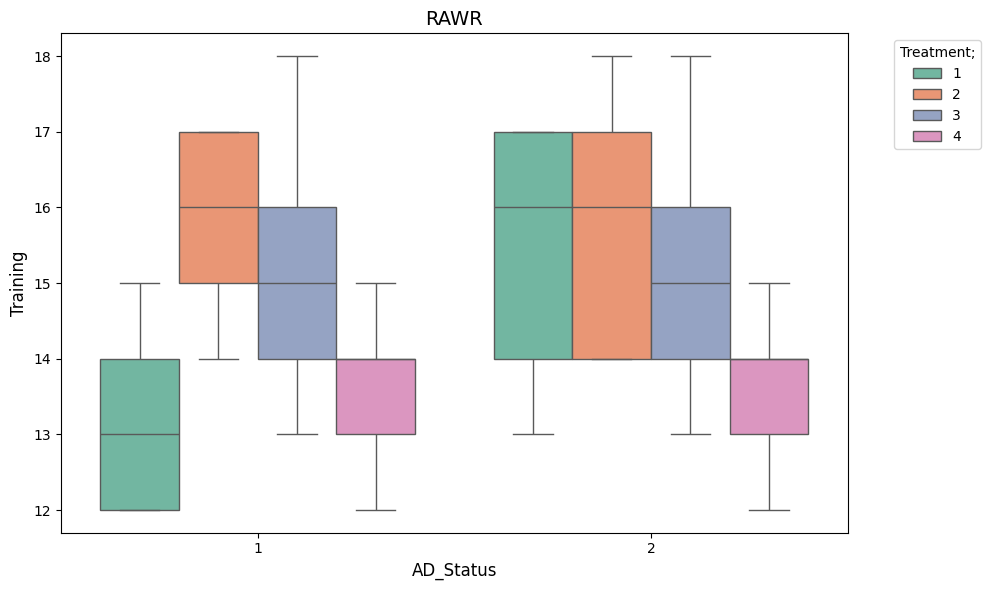

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.boxplot(x='AD_Status', y='Training', hue='Treatment', data=df, palette="Set2", dodge=True)

plt.title("Training error based on AD Status and Treatment", fontsize=14)
plt.xlabel("AD_Status", fontsize=12)
plt.ylabel("Training", fontsize=12)
plt.legend(title="Treatment;", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<b>Remark.</b>  There are no significant outliers between the 6 cells because all fall within the range and are valid.

# Assumption 5
<b>Assumption #5:</b> The distribution of the dependent variable (residuals) should be approximately normally distributed in every cell of the design. 


In [36]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display

def analyze_group_data(df, group_var, target_var):
    descriptive_measures = {}
    for group_name, group_data in df.groupby(group_var)[target_var]:
        n = group_data.count()  # Count of valid observations
        descriptive_measures[group_name] = {
            'Valid': n,
            'Mode': group_data.mode().tolist(),
            'Median': group_data.median(),
            'Mean': group_data.mean(),
            'Std. Deviation': group_data.std(),
            'Variance': group_data.var(),
            'Skewness': group_data.skew(),
            'Std. Error of Skewness': np.sqrt((6 * n * (n - 1)) / ((n - 2) * (n + 1) * (n + 3))) if n > 3 else None,
            'Kurtosis': group_data.kurt(),
            'Std. Error of Kurtosis': np.sqrt(24 / n) if n > 0 else None,
            'Minimum': group_data.min(),
            'Maximum': group_data.max(),
            '25th Percentile': group_data.quantile(0.25),
            '50th Percentile': group_data.quantile(0.50),
            '90th Percentile': group_data.quantile(0.90),
        }
    return pd.DataFrame(descriptive_measures).T

In [37]:
AD_status1 = alz_df[alz_df['AD_Status'] == 1]
analysis_results = analyze_group_data(AD_status1, group_var='Treatment', target_var='Memory')
display(analysis_results)

,Valid,Mode,Median,Mean,Std. Deviation,Variance,Skewness,Std. Error of Skewness,Kurtosis,Std. Error of Kurtosis,Minimum,Maximum,25th Percentile,50th Percentile,90th Percentile
1,5,"[10, 13]",12.0,11.6,1.516575,2.3,-0.315356,0.912871,-3.081285,2.19089,10,13,10.0,12.0,13.0
2,5,[13],13.0,13.2,1.48324,2.2,-0.551618,0.912871,0.867769,2.19089,11,15,13.0,13.0,14.6
3,5,"[10, 11, 12, 14, 15]",12.0,12.4,2.073644,4.3,0.235514,0.912871,-1.963223,2.19089,10,15,11.0,12.0,14.6
4,5,[10],11.0,11.2,1.30384,1.7,0.541387,0.912871,-1.487889,2.19089,10,13,10.0,11.0,12.6


In [27]:
AD_status2 = alz_df[alz_df['AD_Status'] == 2]
analysis_results = analyze_group_data(AD_status2, group_var='Treatment', target_var='Memory')
display(analysis_results)

,Valid,Mode,Median,Mean,Std. Deviation,Variance,Skewness,Std. Error of Skewness,Kurtosis,Std. Error of Kurtosis,Minimum,Maximum,25th Percentile,50th Percentile,90th Percentile
1,5,[8],8.0,8.6,0.894427,0.8,1.257788,0.912871,0.3125,2.19089,8,10,8.0,8.0,9.6
2,5,[7],7.0,7.6,1.949359,3.8,-0.080998,0.912871,-0.817175,2.19089,5,10,7.0,7.0,9.6
3,5,"[8, 9]",8.0,8.2,0.83666,0.7,-0.512241,0.912871,-0.612245,2.19089,7,9,8.0,8.0,9.0
4,5,"[4, 5, 7, 8, 9]",7.0,6.6,2.073644,4.3,-0.235514,0.912871,-1.963223,2.19089,4,9,5.0,7.0,8.6


In [13]:
from IPython.display import display

normality ={}
for i in alz_df['Treatment'].unique():
    for j in alz_df['AD_Status'].unique():
        group_normal=alz_df[(alz_df['Treatment'] == i) & (alz_df['AD_Status'] == j)]['Training']
        stat, p_value = shapiro(group_normal)
        normality[(int(i), int(j))] = {'Statistic': float(stat), 'p-value': float(p_value)}
display(normality)

{(1, 1): {'Statistic': 0.9020198201298117, 'p-value': 0.42114965351611855},
 (1, 2): {'Statistic': 0.866835872224429, 'p-value': 0.2538464637612434},
 (2, 1): {'Statistic': 0.9020198201298121, 'p-value': 0.42114965351612},
 (2, 2): {'Statistic': 0.8939244932314427, 'p-value': 0.3772224660924305},
 (3, 1): {'Statistic': 0.9787161500642191, 'p-value': 0.9276364233495382},
 (3, 2): {'Statistic': 0.9787161500642191, 'p-value': 0.9276364233495382},
 (4, 1): {'Statistic': 0.9608589992013118, 'p-value': 0.8139521277236892},
 (4, 2): {'Statistic': 0.9608589992013118, 'p-value': 0.8139521277236892}}

<b>Remark.</b> The dependent variable, training day, is approximately normally distributed for each combination of their AD status to the respective drug treatment. And as assessed by the Shapiro-Wilk test of normality, (p > 0.05), all fall within the prescribed basis of greater than 0.05. 

# Assumption 6 (Levene's Test)
<b>Assumption #6:  </b>The variance of the dependent variable (residuals) should be equal in every cell of the design.

In [35]:
normality ={}
for i in df['Treatment'].unique():
    for j in df['AD_Status'].unique():
        group_normal=df[(df['Treatment'] == i) & (df['AD_Status'] == j)]['Memory']
        stat, p_value = shapiro(group_normal)
        normality[(int(i), int(j))] = {'Statistic': float(stat), 'p-value': float(p_value)}

display(normality)

{(1, 1): {'Statistic': 0.8029904417735476, 'p-value': 0.08569260402621937},
 (1, 2): {'Statistic': 0.7709079337590306, 'p-value': 0.04595431783856295},
 (2, 1): {'Statistic': 0.9556271474166738, 'p-value': 0.7772534037372361},
 (2, 2): {'Statistic': 0.9529604619046342, 'p-value': 0.7583121101708065},
 (3, 1): {'Statistic': 0.9523514916285045, 'p-value': 0.7539729964660309},
 (3, 2): {'Statistic': 0.8810376385817489, 'p-value': 0.3140395561440371},
 (4, 1): {'Statistic': 0.9020198201298121, 'p-value': 0.4211496535161197},
 (4, 2): {'Statistic': 0.9523514916285045, 'p-value': 0.7539729964660309}}

<b>Remark.</b> As assessed by Levene’s test of equality of variances, p = 0.873, then the variances for each combination of the AD status and drug treatment are homogenous.

# ANOVA Test

In [14]:
from scipy.stats import levene


group_levene = [alz_df[(alz_df['Treatment'] == i) & (alz_df['AD_Status'] == j)]['Training']
          for i in alz_df['Treatment'].unique() for j in alz_df['AD_Status'].unique()]

levene_stat, levene_p = levene(*group_levene)
float(levene_stat), float(levene_p)
print(f"Statistic: {levene_stat} p-value: {levene_p}")

Statistic: 0.43460764587525136 p-value: 0.87305057808911


In [32]:
model = ols('Training ~ C(AD_Status) * C(Treatment)', data=alz_df).fit()
computation = sm.stats.anova_lm(model, typ=2)
computation

,sum_sq,df,F,PR(>F)
C(AD_Status),3.025,1.0,1.216080,0.278356
C(Treatment),28.275,3.0,3.788945,0.019678
C(AD_Status):C(Treatment),9.075,3.0,1.216080,0.319771
Residual,79.600,32.0,NaN,NaN


<b>Remark.</b> Upon inspection, there exists a statistically significant interaction between treatment [C(Treatment)]on the respective training day. In the values, F = 3.789, PR(>F) = 0.0197, meaning that the p-value p-value indicates a statistically significant result at the 𝛼 = 0.05. Since the p-value is less than the 0.05 threshold, the null hypothesis would be rejected at this level. Therefore, the main effects of each independent variable were not reported, as they would be biased through this interaction given. To address, an analysis of simple main effects was conducted with statistical significance assessed at the p <0.025 level using a Bonferroni adjustment. 

# Post-Hoc


In [34]:
tukey_results = pairwise_tukeyhsd(alz_df['Training'], alz_df['Treatment'])
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.5,0.172,-0.4223,3.4223,False
1,3,0.9,0.5931,-1.0223,2.8223,False
1,4,-0.7,0.7612,-2.6223,1.2223,False
2,3,-0.6,0.8347,-2.5223,1.3223,False
2,4,-2.2,0.0196,-4.1223,-0.2777,True
3,4,-1.6,0.1314,-3.5223,0.3223,False


<b>Remark. </b>Analysis on Post hoc were conducted to examine pairwise comparisons between the treatment and the apparent interaction with training day. All pairwise comparisons were run for each simple main effect with reported 95% confidence intervals and p-values Tukey-adjusted within each simple main effect. The differences in the training day are apparent in comparing the groups 2 and 4 with differences at -2.2, therefore rejecting the null hypothesis only at that treatment, whereas from all other groups where the mice taken a different type of treatment has no significant effect in creating errors during training day on group. 

<h2>Reporting:</h2>
A two-way ANOVA was conducted to examine the effects of AD status and treatment
on the quantity of errors of mice during training day. Residual analysis was performed to test for the assumptions of the two-way ANOVA. Outliers were assessed by inspection of a boxplot, normality was assessed using Shapiro-Wilk's normality test for each cell of the design and homogeneity of variances was assessed by Levene's test. There were no outliers, residuals were normally distributed (p > .05) and there was homogeneity of variances (p = 0.873). 

There was no statistically significant interaction between AD status (transgenic vs. wild type) and four treatments on the training performance, F(3,32) = 1.216, p = 0.319. However, there was a statistically significant main effect of Treatment on training performance, F(3,32)=3.789, p=0.020. The main effect of AD Status was not statistically significant, F(1,32)=1.216,p=0.278.
All pairwise comparisons were run for each simple main effect with reported 95% confidence intervals and p-values Bonferroni-adjusted within each simple main effect.
Mean training performance for Treatment groups 1, 2, 3, and 4 were not directly reported but were assessed through pairwise differences. Treatment 2 had a statistically significantly lower mean training performance compared to Treatment 4 (mean difference = -2.2 [95% CI [-4.122, -0.277] p = 0.0196.
Upon inspection, only this was statistically significant, as other comparisons between treatment groups were not statistically significant, therefore not rejecting the null hypothesis. Treatment 2 demonstrated significantly poorer performance in training compared to Treatment 4, but no other differences between treatments reached statistical significance.
